# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso
from sklearn.metrics import r2_score
from mlxtend.evaluate import bias_variance_decomp

import warnings
warnings.filterwarnings('ignore')

# How are the coefficients affected by Alpha(Lambda)?

## Load the dataset

In [2]:
data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.shape

(442, 11)

## Train Test Split

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
X.shape, y.shape

((442, 10), (442,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

## Lasso Regression

In [9]:
coefs = list()
r2_scores = list()
alphas = [0, 0.1, 1, 10]

for i in alphas:
    lasso = Lasso(alpha=i)

    # Fit the model
    lasso.fit(X_train, y_train)

    # Prediction on test data
    y_pred = lasso.predict(X_test)

    # Append the values of coef_ and r2_score
    coefs.append(lasso.coef_.tolist())
    r2_scores.append(r2_score(y_test, y_pred))

## Plottings

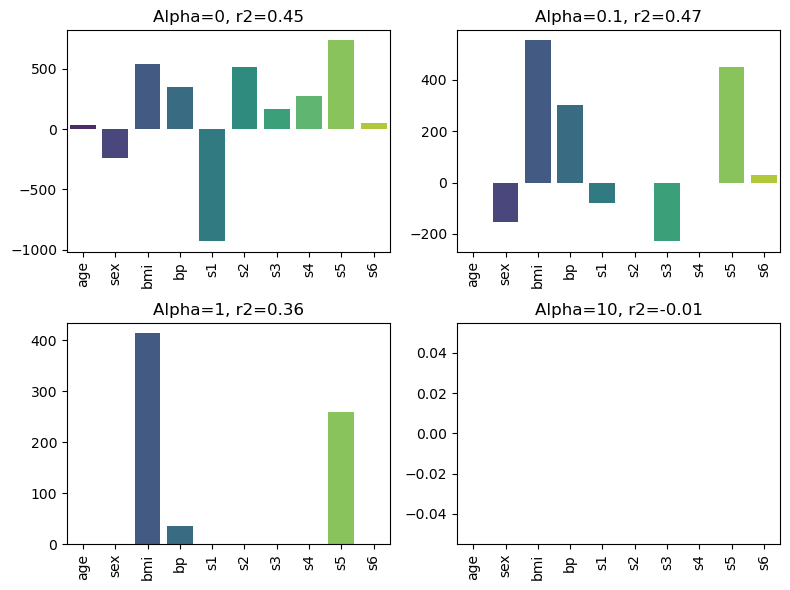

In [10]:
plt.figure(figsize=(8,6))

for i, alpha in enumerate(alphas):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=data.feature_names, y=coefs[i], palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f'Alpha={alpha}, r2={r2_scores[i]:.2f}')
plt.tight_layout()
plt.show()

**Top-left (Alpha=0, r²=0.45):**
- This is equivalent to ordinary linear regression (no regularization). The coefficients vary widely, ranging roughly from +750 to –1000, with many non‑zero values.

**Top-right (Alpha=0.1, r²=0.47):**
- After applying a small amount of Lasso regularization, several coefficients have shrunk significantly, and some coefficients are driven exactly to zero, leaving only a subset of features active.

**Bottom-left (Alpha=1, r²=0.36):**
- With stronger regularization, even more coefficients are pushed to zero. Only a few features remain with non‑zero coefficients, and their magnitudes are smaller compared to the previous plots.

**Bottom-right (Alpha=10, r²=0.01):**
- At very high regularization strength, almost all coefficients are shrunk to exactly zero, effectively removing most features from the model. The model’s explanatory power (r²) drops dramatically.

**Unlike Ridge regression (which only shrinks coefficients), Lasso regression performs feature selection—many coefficients become exactly zero as alpha increases, leaving only the most important predictors in the model.**

# Are the larger coefficients affected the most due to Regularization?

## Lasso Regression

In [11]:
coefs = list()
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for i in alphas:
    lasso = Lasso(alpha=i)

    # Fit the model
    lasso.fit(X_train, y_train)

    # Append the values of coef_ and r2_score
    coefs.append(lasso.coef_.tolist())

## Coefficents Dataframe

In [12]:
coefs_df = pd.DataFrame(data=np.array(coefs), columns=data.feature_names)
coefs_df['alpha'] = alphas
coefs_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488838,518.062271,163.419980,275.317901,736.198856,48.670657
0.0001,37.891667,-241.878244,542.524544,347.624893,-924.832045,513.033268,160.224210,274.036385,733.762619,48.690013
0.0010,37.780431,-241.103200,543.386372,346.914418,-864.934721,467.782935,131.468467,262.504646,711.841733,48.864159
0.0100,35.347451,-231.906664,551.303242,341.313469,-483.567140,165.990532,-25.834899,216.875803,566.815003,49.702475
0.1000,0.000000,-152.664779,552.697775,303.365158,-81.365007,-0.000000,-229.255776,0.000000,447.919525,29.642617
1.0000,0.000000,-0.000000,413.431848,34.830515,0.000000,0.000000,-0.000000,0.000000,258.152894,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


- Larger coefficients will be penalized.
- As the alpha values increases, the coefficients of those columns which are least required for prediction will shrink faster and eventually will become ZERO.
- For alpha = 0.1000, you can see some of the coefficients of columns become ZERO, which implies Lasso has performed feature selection when an appropriate alpha is set.
- Caveat: If the value of alpha is too large, then all the coefficients will become ZERO, creating sparsity. 

## Plotting

In [13]:
coefs = list()
alphas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.1, 0.5, 1, 5, 10]

for i in alphas:
    lasso = Lasso(alpha=i)

    # Fit the model
    lasso.fit(X_train, y_train)

    # Append the values of coef_ and r2_score
    coefs.append(lasso.coef_.tolist())

In [14]:
input_array = np.array(coefs).T

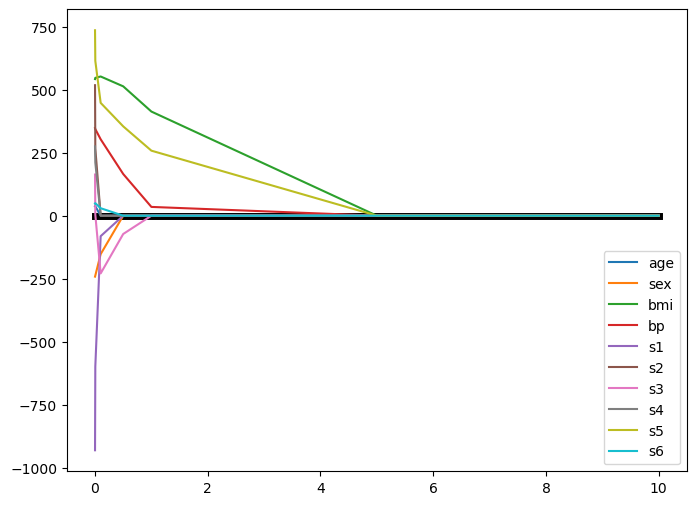

In [15]:
plt.figure(figsize=(8,6))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label=data.feature_names[i])
plt.legend()
plt.show()

- Thick Black color line is the ZERO Line of the coefficients.
- See how quickly the lines shrink to ZERO line.

# How does Lasso effect Bias and Variance?

## Create some non-linear data

In [16]:
X = 5 * np.random.rand(100, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(100, 1) 

## Scatter Plot of X vs y

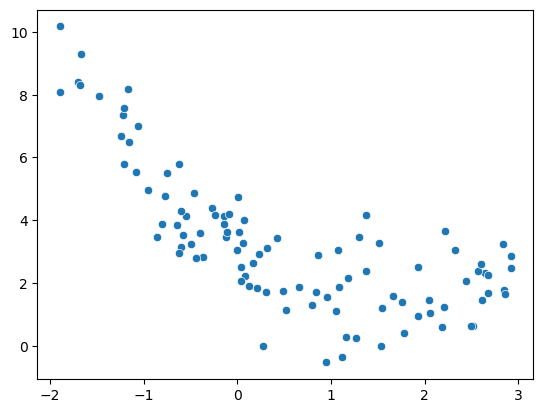

In [17]:
sns.scatterplot(x=X.ravel(), y=y.ravel());

## Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100, 1), y.reshape(100), test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80,), (20,))

## Apply PolynomialFeatures transformation

In [20]:
poly = PolynomialFeatures(degree=5)

In [21]:
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

## Lasso Regression

In [22]:
alphas = np.linspace(start=0, stop=30, num=5)

loss = list()
bias = list()
variance = list()

for i in alphas:
    lasso = Lasso(alpha=i)

    # Fit the model using bias_variance_decomp
    avg_expected_loss, avg_bias, avg_variance = bias_variance_decomp(lasso, X_train, y_train, X_test, y_test, 
                                                                     loss='mse', random_seed=42)

    # Append these values to the lists
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(variance)

In [23]:
alphas

array([ 0. ,  7.5, 15. , 22.5, 30. ])

## Plotting of Bias-Variance Curve - killing the kernel

In [24]:
# plt.plot(alphas, loss, label='loss')
# plt.plot(alphas, bias, label='Bias')
# plt.plot(alphas, variance, label='Variance')
# plt.ylim(0,5)
# plt.xlabel('Alpha')
# plt.legend()
# plt.show()

In [25]:
# !nvidia-smi

# Effect of Lasso Regularization on Loss Function

## Generate some dataset

In [26]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

## Scatter Plot of X vs y

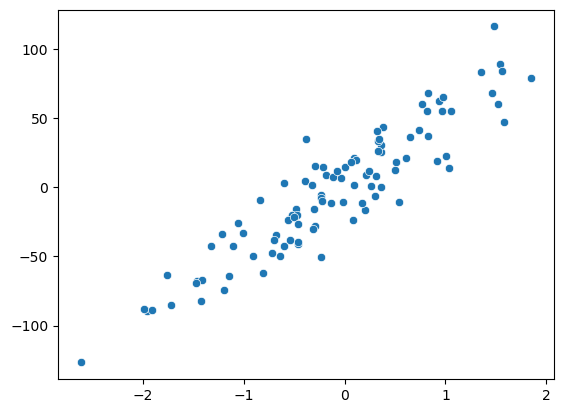

In [27]:
sns.scatterplot(x=X.ravel(), y=y.ravel());

## Linear Regression

In [28]:
lr = LinearRegression()

# Fit the model
lr.fit(X,y)

# Coefficient and Intercept
print('Coefficient: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  [47.13323967]
Intercept:  2.3302306410539453


## Calculate Loss

In [29]:
def calculate_loss(coef, alpha):
    # L = np.sum(Yi - m * Xi)^2 + lambda * m^2
    return np.sum((y - coef * X.ravel() + 2.33) ** 2) + alpha * coef * coef

In [30]:
def predict(coef):
    return coef * X + 2.33

## Plotting

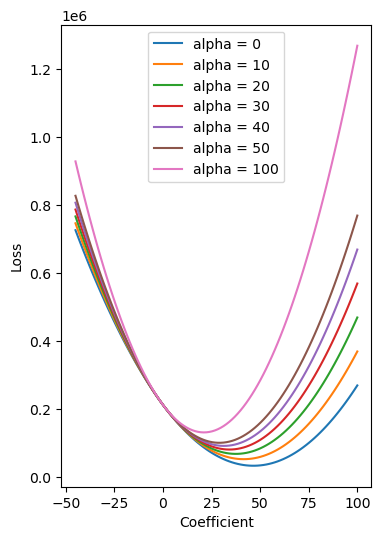

In [31]:
coef = np.linspace(start=-45, stop=100, num=100)
alphas = [0, 10, 20, 30, 40, 50, 100]

plt.figure(figsize=(4,6))

for j in alphas:
    loss = []
    for i in range(coef.shape[0]):
        loss_i = calculate_loss(coef[i], j)
        loss.append(loss_i)
    plt.plot(coef, loss, label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Coefficient')
plt.ylabel('Loss')
plt.show()

- As the alpha increases, the loss function curve moves towards origin, which implies, the coefficients shrink.